# Example usage of data-drive-quadtrature annealing optimization

In [8]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datadrivenquadrature import *

In [2]:
# Load in data
x_file_path = './../data/pyarts_training_72000_all_levels.h5'
x = xr.open_mfdataset(x_file_path, combine = 'nested', concat_dim = 'column', engine = "netcdf4")
x_sup = np.reshape(np.array(x['spectral_fluxes']), (55*50, x['spectral_fluxes'].shape[-1]))
# y_file_path = './../data/spec_outgoing_net_norm_4angle.h5'
# y_ref = xr.open_dataset(y_file_path, engine = "netcdf4")
y_ref = np.array(x['reference_fluxes'].data).flatten()

In [3]:
print("x:\n", x)
print("y:\n", np.asarray(y_ref).shape)
print("x_sup:\n", x_sup.shape)
print("axis_len:\n", (x['spectral_fluxes'].shape)[-1])

x:
 <xarray.Dataset>
Dimensions:            (half_level: 55, column: 50, spectral_coord: 72120,
                        level: 54)
Coordinates:
  * half_level         (half_level) int64 0 1 2 3 4 5 6 ... 48 49 50 51 52 53 54
  * level              (level) int64 0 1 2 3 4 5 6 7 ... 46 47 48 49 50 51 52 53
  * column             (column) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
  * spectral_coord     (spectral_coord) float32 0.0002 0.0202 ... 3.26e+03
Data variables:
    spectral_fluxes    (half_level, column, spectral_coord) float64 dask.array<chunksize=(55, 50, 72120), meta=np.ndarray>
    reference_fluxes   (half_level, column) float64 dask.array<chunksize=(55, 50), meta=np.ndarray>
    reference_heating  (column, level) float64 dask.array<chunksize=(50, 54), meta=np.ndarray>
    pressures          (column, half_level) float32 dask.array<chunksize=(50, 55), meta=np.ndarray>
y:
 (2750,)
x_sup:
 (2750, 72120)
axis_len:
 72120


In [4]:
def user_cost_fnc(y, y_hat):
    cost = sum(y - y_hat)
    return cost

def map_func(x, point_set, x_sup=None):
    point_idxs = [list(point.values())[0] for point in point_set]
    points = np.array(x.spectral_fluxes[:,:,point_idxs].values).reshape((55*50, 6))
    return points

In [5]:
params = {}
integration_list = ['spectral_coord']
params['integration_list'] = integration_list
params['n_points'] = 6
params['epochs'] = 100
params['success'] = 10
params['block_size'] = 10

history = optimize(x, y_ref, user_cost_fnc, map_func, params, x_sup=x_sup)

19782.898081934625 538.6392845118492 159.95990118171838
EPOCH: 0


c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
EPOCH: 10
EPOCH: 11
EPOCH: 12
EPOCH: 13
EPOCH: 14
EPOCH: 15
EPOCH: 16
EPOCH: 17
EPOCH: 18
EPOCH: 19
EPOCH: 20
EPOCH: 21
EPOCH: 22


c:\Python311\Lib\site-packages\cvxpy\problems\problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


EPOCH: 23
EPOCH: 24
EPOCH: 25
EPOCH: 26
EPOCH: 27
EPOCH: 28
EPOCH: 29
EPOCH: 30
EPOCH: 31
EPOCH: 32
EPOCH: 33
EPOCH: 34
EPOCH: 35
EPOCH: 36
EPOCH: 37
EPOCH: 38
EPOCH: 39
EPOCH: 40
EPOCH: 41
EPOCH: 42
EPOCH: 43
EPOCH: 44
EPOCH: 45
EPOCH: 46
EPOCH: 47
EPOCH: 48
EPOCH: 49
EPOCH: 50
EPOCH: 51
EPOCH: 52
EPOCH: 53
EPOCH: 54
EPOCH: 55
EPOCH: 56
EPOCH: 57
EPOCH: 58
EPOCH: 59
EPOCH: 60
EPOCH: 61
EPOCH: 62
EPOCH: 63
EPOCH: 64
EPOCH: 65
EPOCH: 66
EPOCH: 67
EPOCH: 68
EPOCH: 69
EPOCH: 70
EPOCH: 71
EPOCH: 72
EPOCH: 73
EPOCH: 74
EPOCH: 75
EPOCH: 76
EPOCH: 77
EPOCH: 78
EPOCH: 79
EPOCH: 80
EPOCH: 81
EPOCH: 82
EPOCH: 83
EPOCH: 84
EPOCH: 85
EPOCH: 86
EPOCH: 87
EPOCH: 88
EPOCH: 89
EPOCH: 90
EPOCH: 91
EPOCH: 92
EPOCH: 93
EPOCH: 94
EPOCH: 95
EPOCH: 96
EPOCH: 97
EPOCH: 98
EPOCH: 99


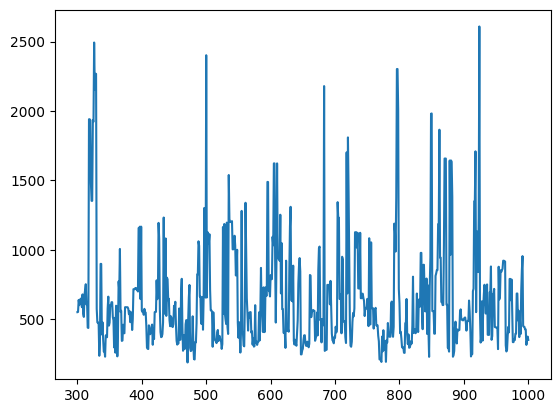

In [12]:
# Plot cost history
history_cost_x = np.arange(0, len(history[0]), 1)
plt.plot(history_cost_x[300:], history[0][300:])